# Imbalance Learning

Performed on original dataset

#### Importing libraries

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

#### Load Train and Test set & Save dataset in a new csv called "df_train_binary" and "df_test_binary"


In [2]:
df_train = pd.read_csv('csv/train.csv')
df_test = pd.read_csv('csv/test.csv')

In [3]:
df_train.to_csv("csv/train_binary.csv", index=False)
df_test.to_csv("csv/test_binary.csv", index=False)

In [4]:
df_train_binary = pd.read_csv('csv/train_binary.csv')
df_test_binary = pd.read_csv('csv/test_binary.csv')

#### From multiclass to binary class

Class 0 -> LAYING STANDING SITTING WALKING  WALKING_DOWNSTAIRS

Class 1 -> WALKING_UPSTAIRS

In [5]:
df_train_binary['Class'] = 0
df_test_binary['Class'] = 0

df_train_binary.loc[(df_train['Activity']==2), 'Class'] = 1
df_test_binary.loc[(df_test['Activity']==2), 'Class'] = 1

In [6]:
df_train_binary.drop(['Activity'], axis = 1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityName,Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS,1
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS,1
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS,1
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS,1


In [7]:
df_test_binary.drop(['Activity'], axis = 1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,ActivityName,Class
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING,0
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING,0
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING,0
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING,0
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS,1
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS,1
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS,1
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS,1


# Analysis 'Class'

In [8]:
df_train_binary['Class'].value_counts()

0    6279
1    1073
Name: Class, dtype: int64

In [9]:
df_test_binary['Class'].value_counts()

0    2476
1     471
Name: Class, dtype: int64

In [10]:
df_train_binary['Class'].value_counts() * 100 / len(df_train_binary['Class'])

0    85.405332
1    14.594668
Name: Class, dtype: float64

In [11]:
df_test_binary['Class'].value_counts() * 100 / len(df_test_binary['Class'])

0    84.017645
1    15.982355
Name: Class, dtype: float64

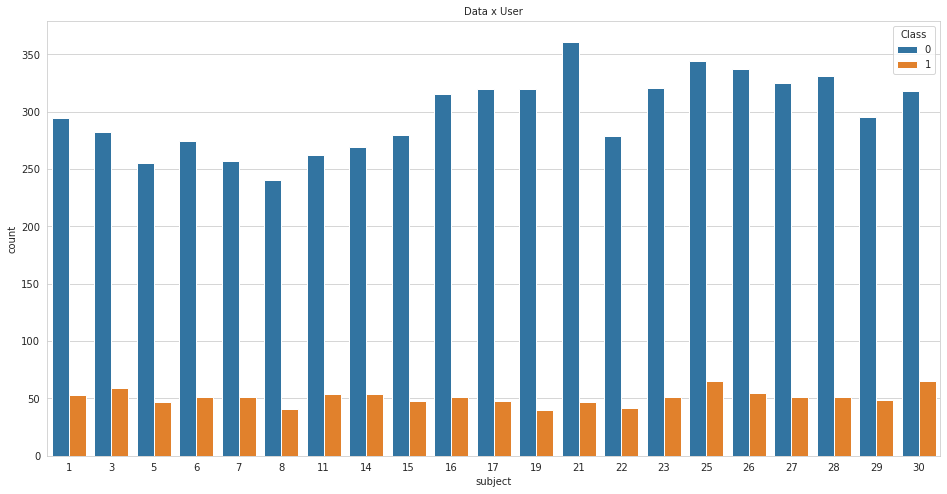

In [12]:
# Subject (training set) x Target variable ('Class')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data x User', fontsize=10)
sns.countplot(x='subject',hue='Class', data = df_train_binary)
plt.show()

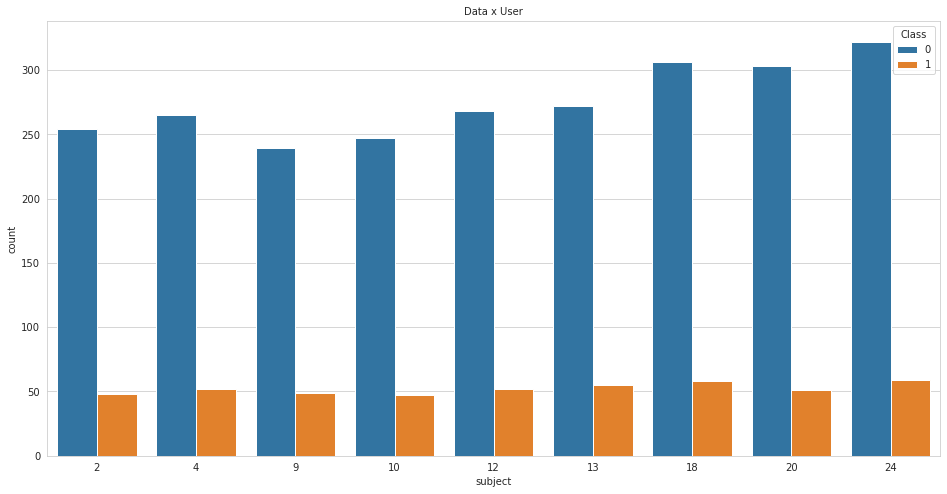

In [13]:
# Subject (test set) x Target variable ('Class')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data x User', fontsize=10)
sns.countplot(x='subject',hue='Class', data = df_test_binary)
plt.show()

# Decision tree

#### Original dataset

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve

In [15]:
X_train = df_train_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_train = df_train_binary.Class

In [16]:
X_test = df_test_binary.drop(['subject','Activity','ActivityName','Class'], axis = 1)
y_test = df_test_binary.Class

In [17]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [18]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1], dtype=int64), array([6279, 1073], dtype=int64)),
 (array([0, 1], dtype=int64), array([2476,  471], dtype=int64)))

In [19]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# Hyperparameters tuning RandomizedSearchCV : takes 9 min
param_list = {"criterion": ['gini', 'entropy'], # impurity measurement 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10], # cut of the leaf
             'min_samples_split': [2, 3, 4, 5, 8, 10], # min n. of samples required in a node to split the node
             'min_samples_leaf': [1, 2, 3, 4, 5, 10] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }
random_search = RandomizedSearchCV(clf_DT, param_distributions=param_list, scoring='recall', n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

res = random_search.cv_results_

In [21]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=8)

In [23]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.802 (std: 0.189)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 10, 'max_depth': 3, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.801 (std: 0.187)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.761 (std: 0.226)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 4, 'criterion': 'entropy'}



In [25]:
clf_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10, min_samples_split=8)
clf_DT.fit(X_train, y_train)

y_pred = clf_DT.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8870037326094333
F1-score [0.93152375 0.67701261]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2476
           1       0.62      0.74      0.68       471

    accuracy                           0.89      2947
   macro avg       0.79      0.83      0.80      2947
weighted avg       0.90      0.89      0.89      2947



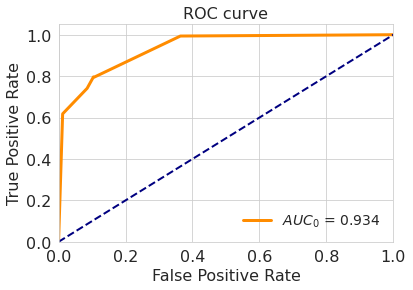

In [26]:
y_score = clf_DT.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [27]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [28]:
prc_auc = auc(recall, precision)
prc_auc

0.8097197846490001

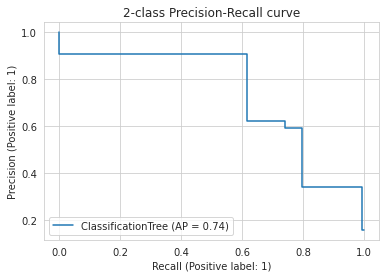

In [29]:
y_score = clf_DT.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

#### RandomUnderSampler

Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [31]:
rus = RandomUnderSampler(random_state = 42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1073, 1: 1073})


In [32]:
clf_DT_rus = DecisionTreeClassifier()
clf_DT_rus.fit(X_res, y_res)

DecisionTreeClassifier()

In [33]:
# Hyperparameters tuning RandomizedSearchCV : takes 2 min
param_list = {"criterion": ['gini', 'entropy'], # impurity measurement 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10], # cut of the leaf
             'min_samples_split': [2, 3, 4, 5, 8, 10], # min n. of samples required in a node to split the node
             'min_samples_leaf': [1, 2, 3, 4, 5, 10] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }
random_search = RandomizedSearchCV(clf_DT_rus, param_distributions=param_list, scoring='recall', n_iter=50, random_state=42)
random_search.fit(X_res, y_res)

res = random_search.cv_results_

In [34]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=10)

In [35]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.871 (std: 0.111)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.871 (std: 0.111)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 10, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.871 (std: 0.111)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.871 (std: 0.111)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.871 (std: 0.111)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'entropy'}



In [38]:
clf_DT_rus = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10, min_samples_split=8)
clf_DT_rus.fit(X_res, y_res)

y_pred = clf_DT_rus.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9131319986426875
F1-score [0.94807302 0.73443983]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2476
           1       0.72      0.75      0.73       471

    accuracy                           0.91      2947
   macro avg       0.84      0.85      0.84      2947
weighted avg       0.91      0.91      0.91      2947



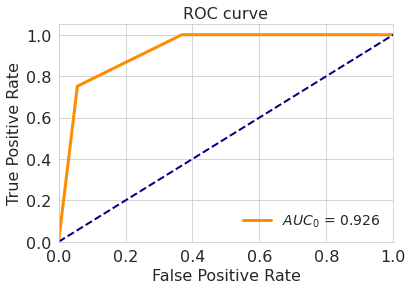

In [39]:
y_score = clf_DT_rus.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [41]:
prc_auc = auc(recall, precision)
prc_auc

0.7771218967530871

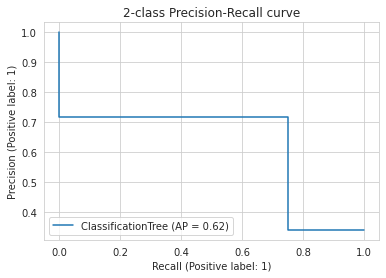

In [42]:
y_score = clf_DT_rus.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Oversampling

In [43]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#### RandomOverSampler

Object to over-sample the minority class(es) by picking samples at random with replacement. 

In [44]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [45]:
clf_DT_ros = DecisionTreeClassifier()
clf_DT_ros.fit(X_res, y_res)

DecisionTreeClassifier()

In [46]:
# Hyperparameters tuning RandomizedSearchCV : takes 12 min
param_list = {"criterion": ['gini', 'entropy'], # impurity measurement 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10], # cut of the leaf
             'min_samples_split': [2, 3, 4, 5, 8, 10], # min n. of samples required in a node to split the node
             'min_samples_leaf': [1, 2, 3, 4, 5, 10] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }
random_search = RandomizedSearchCV(clf_DT_ros, param_distributions=param_list, scoring='recall', n_iter=50, random_state=42)
random_search.fit(X_res, y_res)

res = random_search.cv_results_

In [47]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=4)

In [48]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [49]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}



In [50]:
clf_DT_ros = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=4)
clf_DT_ros.fit(X_res, y_res)

y_pred = clf_DT_ros.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9412962334577536
F1-score [0.96528196 0.81009879]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2476
           1       0.84      0.78      0.81       471

    accuracy                           0.94      2947
   macro avg       0.90      0.88      0.89      2947
weighted avg       0.94      0.94      0.94      2947



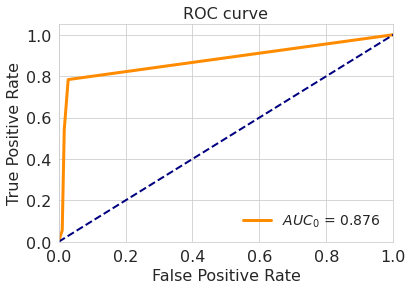

In [51]:
y_score = clf_DT_ros.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [52]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [53]:
prc_auc = auc(recall, precision)
prc_auc

0.6826292417186988

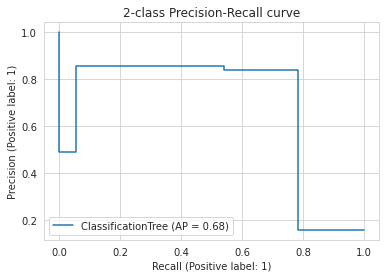

In [54]:
y_score = clf_DT_ros.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### SMOTE

In [55]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [56]:
clf_DT_sm = DecisionTreeClassifier()
clf_DT_sm.fit(X_res, y_res)

DecisionTreeClassifier()

In [57]:
# Hyperparameters tuning RandomizedSearchCV : takes > 25 min
param_list = {"criterion": ['gini', 'entropy'], # impurity measurement 
              'max_depth': [None] + [2, 3, 4, 6, 8, 10], # cut of the leaf
             'min_samples_split': [2, 3, 4, 5, 8, 10], # min n. of samples required in a node to split the node
             'min_samples_leaf': [1, 2, 3, 4, 5, 10] # min n. of samples required to be in both left and right 
                                                                         # child of a parent node to split that parent node
             }
random_search = RandomizedSearchCV(clf_DT_sm, param_distributions=param_list, scoring='recall', n_iter=50, random_state=42)
random_search.fit(X_res, y_res)

res = random_search.cv_results_

In [58]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [59]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [60]:
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.996 (std: 0.003)
Parameters: {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.995 (std: 0.004)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.995 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}



In [61]:
clf_DT_sm = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=3)
clf_DT_sm.fit(X_res, y_res)

y_pred = clf_DT_sm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9290804207668816
F1-score [0.95761509 0.78296989]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2476
           1       0.77      0.80      0.78       471

    accuracy                           0.93      2947
   macro avg       0.86      0.88      0.87      2947
weighted avg       0.93      0.93      0.93      2947



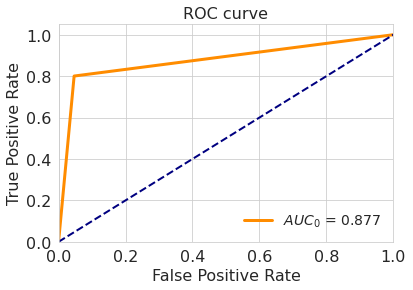

In [62]:
y_score = clf_DT_sm.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [63]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [64]:
prc_auc = auc(recall, precision)
prc_auc

0.7992908176500602

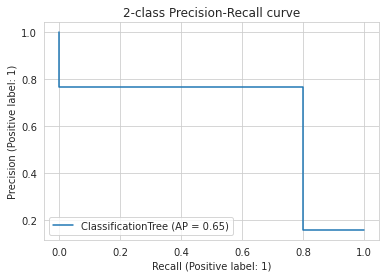

In [65]:
y_score = clf_DT_sm.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

# kNN

#### Orginal dataset

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Hyperparameter tuning: takes 9 min
parameters = {'n_neighbors': np.arange(20, 100 + 1), 'weights':['uniform', 'distance']}

clf_knn = KNeighborsClassifier()
search = GridSearchCV(clf_knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100]),
                         'weights': ['uniform', 'distance']})

In [68]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=38, weights='distance')

In [69]:
clf_knn = KNeighborsClassifier(n_neighbors=38, weights='distance')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=38, weights='distance')

In [70]:
y_pred = clf_knn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9674244994910078
F1-score [0.98067633 0.89632829]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2476
           1       0.91      0.88      0.90       471

    accuracy                           0.97      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.97      0.97      0.97      2947



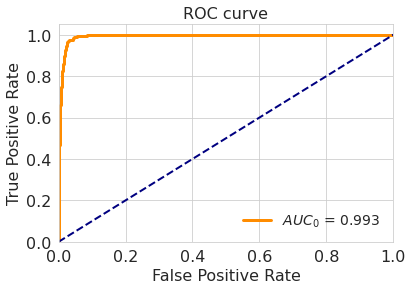

In [71]:
y_score = clf_knn.predict_proba(X_test)

fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [73]:
prc_auc = auc(recall, precision)
prc_auc

0.9617373160499412

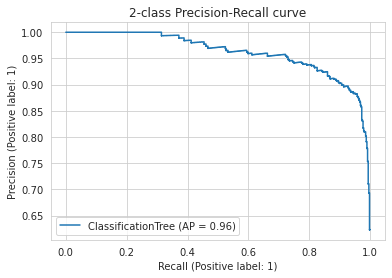

In [74]:
y_score = clf_knn.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Undersampling

In [75]:
from imblearn.under_sampling import RandomUnderSampler

#### RandomUnderSampler

In [76]:
rus = RandomUnderSampler(random_state = 42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1073, 1: 1073})


In [77]:
clf_knn_rus = KNeighborsClassifier()
clf_knn_rus.fit(X_res, y_res)

KNeighborsClassifier()

In [78]:
# Hyperparameter tuning: 1 min
parameters = {'n_neighbors': np.arange(20, 100 + 1), 'weights':['uniform', 'distance']}

search = GridSearchCV(clf_knn_rus, parameters)
search.fit(X_res, y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100]),
                         'weights': ['uniform', 'distance']})

In [79]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [80]:
clf_knn_rus = KNeighborsClassifier(n_neighbors=20, weights='distance')
clf_knn_rus.fit(X_res, y_res)
y_pred = clf_knn_rus.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9392602646759416
F1-score [0.96251309 0.84003575]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2476
           1       0.73      1.00      0.84       471

    accuracy                           0.94      2947
   macro avg       0.86      0.96      0.90      2947
weighted avg       0.96      0.94      0.94      2947



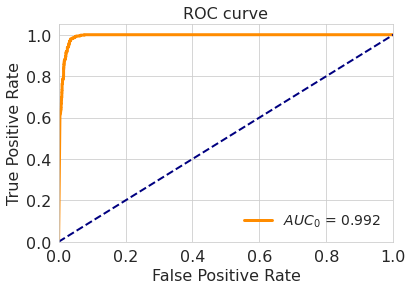

In [81]:
y_score = clf_knn_rus.predict_proba(X_test)

fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [82]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [83]:
prc_auc = auc(recall, precision)
prc_auc

0.9528097588908031

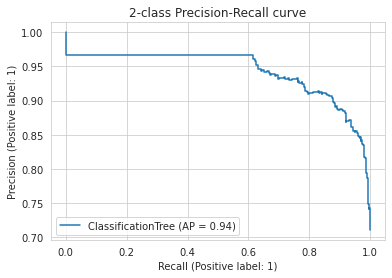

In [84]:
y_score = clf_knn_rus.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Oversampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#### RandomOverSampler

In [86]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [87]:
clf_knn_ros = KNeighborsClassifier()
clf_knn_ros.fit(X_res, y_res)

KNeighborsClassifier()

In [88]:
# Hyperparameter tuning : takes 21 min
parameters = {'n_neighbors': np.arange(20, 100 + 1), 'weights':['uniform', 'distance']}

search = GridSearchCV(clf_knn_ros, parameters)
search.fit(X_res, y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100]),
                         'weights': ['uniform', 'distance']})

In [89]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [90]:
clf_knn_ros = KNeighborsClassifier(n_neighbors=20, weights='distance')
clf_knn_ros.fit(X_res, y_res)
y_pred = clf_knn_ros.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9562266711910418
F1-score [0.9733416  0.87772512]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2476
           1       0.79      0.98      0.88       471

    accuracy                           0.96      2947
   macro avg       0.89      0.97      0.93      2947
weighted avg       0.96      0.96      0.96      2947



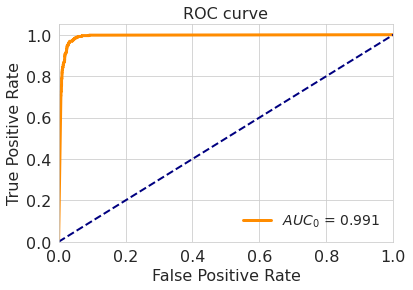

In [91]:
y_score = clf_knn_ros.predict_proba(X_test)

fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [92]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [93]:
prc_auc = auc(recall, precision)
prc_auc

0.9531731935778486

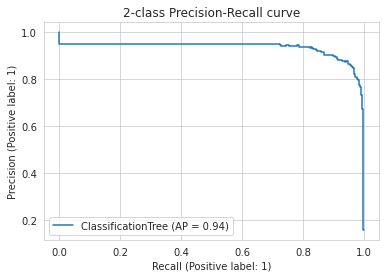

In [94]:
y_score = clf_knn_ros.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### SMOTE

In [95]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6279, 1: 6279})


In [96]:
clf_knn_sm = KNeighborsClassifier()
clf_knn_sm.fit(X_res, y_res)

KNeighborsClassifier()

In [97]:
# Hyperparameter tuning: takes 53
parameters = {'n_neighbors': np.arange(20, 100 + 1), 'weights':['uniform', 'distance']}

search = GridSearchCV(clf_knn_sm, parameters)
search.fit(X_res, y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100]),
                         'weights': ['uniform', 'distance']})

In [98]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [99]:
clf_knn_sm = KNeighborsClassifier(n_neighbors=20, weights='uniform')
clf_knn_sm.fit(X_res, y_res)
y_pred = clf_knn_sm.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9307770614183916
F1-score [0.95705263 0.82167832]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2476
           1       0.70      1.00      0.82       471

    accuracy                           0.93      2947
   macro avg       0.85      0.96      0.89      2947
weighted avg       0.95      0.93      0.94      2947



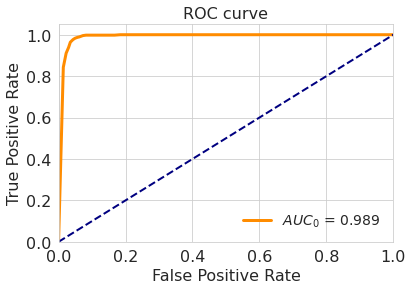

In [100]:
y_score = clf_knn_sm.predict_proba(X_test)

fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [101]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

In [102]:
prc_auc = auc(recall, precision)
prc_auc

0.943494634408413

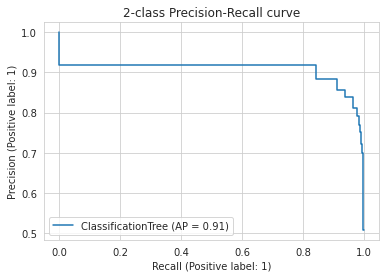

In [103]:
y_score = clf_knn_sm.predict_proba(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score[:,1], name="ClassificationTree")
_ = display.ax_.set_title("2-class Precision-Recall curve")